By: Nupur Mittal

# Bank Customer Churn Prediction Using Machine Learning

# Introduction and Summary of the Project

Churn is a metric that shows customers who stop doing business with the company and by following this metric most of the business could try to understand the reason behind churn numbers and make strategies to tackle the customer churn. Most of the companies focus largely on customer acquisition than on customer retention. This however, can cost companies five times more to attract a new customer than it does to retain an existing one.The reasons that could lead to the customers leaving the service with the company can be numerous but it is of high importance for the companies to identify these factors and take actions quickly and efficiently prior to customer leaving the bank. Increasing customer retention can lead to a significant increase in the profits of the company. 

Therefore the main objective of this project is to work on the anonymous bank customer churn dataset obtained from Kaggle and identify and visualize which factors contribute to the customer churn from bank as well as to build a prediction model that will perform the classification task and classify whether a customer is going to churn or not and based on the model performance, choose a model that will attach a probability to the churn to make it easier for the customer service to target low hanging fruits in their efforts to prevent churn. This dataset contains total 1000 customers and 14 attributes related to their demographics,credit score, bank balance, loaction, time stayed with the bank, number of products purchased and whether they have credit card or not and whether they are active members or not. The target variable is Exited feature.

There are six continuous variables - CreditScore,Age,Tenure,Balance,NumOfProducts and EstimatedSalary(where balance, credit score and estimated salary are in US dollars and Tenure and Age in years)

There are five categorical variables - Geography, Gender, HasCrCard,IsActiveMember and Exited

The analysis have been performed in the below three steps:

**-Exploratory Analysis**

**-Data Preprocessing and Preparation**

**-Training,tuning and evaluating machine learning models**

**Exploratory Analysis:**

In order to identify patterns that can yield to customer churn, exploratory analysis was performed on the dataset. The bar graphs, histograms and boxplots were made and some useful insights were drawn and explained in the notebook below. I created two new attributes Age_Type and Tenure_Group by bucketing the data of age groups into 18-34(Young Adults), 35-54(Mid-Age),55-71(Seniors 1) and 72-92(Seniors 2) and for tenure groups into 0-2,3-5,6-8,9-10 in order to identify the bucket of customers leaving the bank in Age and Tenure. This gives insights into the type of customers which are currently existing with the bank and which have higher likelyhood of churning.

**Data Preprocessing and Preparation:**

The missing data was found in CreditScore, Balance and EstimatedSalary attributes. These missing data was replaced with the mean of the column using Simple Imputer, in oreder to have a clean dataset for churn prediction.

The variables such as RowNumber, CustomerID, Surname did not have any predictive power as these were unuique to the customers and therefore were removed from the analysis. Similarly the additional attributes Age_Type and Tenure_Group which were created for exploratory analysis were also removed since they did not have any predictive power and Age and Tenure were already present in the data in the form of continuous variables, so to avoid the duplicacy of the data, these new attributes were removed.

Since the data was imbalanced because out of total entries, 7963 customers were with the bank and 2031 customers churned, I have balanced the data using random over sampling through imblearn library and adding new samples in the minority class to make more accurate predictions. This prevents getting pretty high accuracy just by predicting the majority class and failing to capture the minority class.

The categorical variables were dummyfied using the label encoding and gone hot encoding methods. The correlation matrix was formed in order to understand if there are any variables which are high colliear. From the matrix it was observed that there was no collinearity issues in the dataset as no two variables were highly correlated because there correlation coefficients were not 0.95 and above. Similarly, I did not observe any variable which was highly collinear with the target variable.

While exploring the data it was observed that there were some outliers in the CreditScore and Age attributes, so these outliers were removed from the training dataset for better predictions.

The training and testing data was then standardised to ensure that each input variable has the same range so that the effect on the model is similar and the variable such as Estimated Salary that has greater ranges does not have larger influence on the model's results

After this, the feature selection process was performed using Lasso and RFE methods to select the predictors which play a significant role in explaining the variation between X and Y better. The features that came out to be less useful for the prediction purpose were "CreditScore","Tenure","HasCrCard","EstimatedSalary","Geography_Spain","Geography_France" as based on their RFE rankings and Lasso cofficients(zero). Therefore, for the modelling purpose these useless predictors were removed from the analysis.

**Training,tuning and evaluating machine learning models:**

For the churn problem, the ideal metric to be used is Recall. Recall answers the following question: what proportion of actual positives was identified correctly? In that case, Recall measures the percentage of churns that were correctly classified out of the total churns, which is what I have looked for to analyze the performance of ML classifiers.
As an example, consider a re-engagement campaign which provides homes loans and higher returns on customer savings. We'd likely want to ensure that the precision for this offering is high. In other words, we would want to minimize the number of happy users who will receive the offering, and instead have this offering hitting almost exclusively users in danger of churning.

I applied three different ML algorithms (Logistic Regression, Random Forest Classifier and Gradient Boosting Classifier) to analyze and compare the Recall, Precision, Accuracy and F1 scores obtained by each of them.

To improve the overall performance of the model, I tuned the algorithms hyperparameters using GridSearchCV.

Models were built on the selected features and after the application of various models, it was found that Gradient Boosting Model generated the highest accuracy score of approx. 87% with optimal hyperparameters as compared to other models.It also has a highest recall of 92% and precision rate of 85%. This illustrates that GBT model correctly identifies if the curstomers are churning or not, when the customers are actually churning from the bank with 92% probability and with a precision of 85%. In terms of false positives, the rate is lowest in GBT model which is 16% as compared to Random Forest Model with 17% and Logistic Regression Model with 28%. This illustrates that only 16% of the satisfied customers can be incorrectly predicted as churning from GBT model making the model efficient.(These results can be seen in the heatmap matrix shown in this notebook in the modelling section). 

The GBT model also highlighted three most important features when it comes to churn prediction of customers in a bank. Balance plays an important role, where if the balance in customer's account is below a certain threshold, there is a possibility that the customer may churn in the near future. Similarly, Age is the second important feature so the Middle Age people are more prone to churning due to high appetite for risk due to higher earnings and better living standards that other age groups and they may get better opportunities to invest their money or have premium services elsewhere.Lastly, the number of products also plays an important role in customer churning and the lesser the quality products and services are offered more will be the chances of customer being unsatisfied and leaving the bank.

**Business Benefit:** The Gradient Boosting Model built in this project would proof very helpful to the bank as they will be able to predict the churning of customers with 88% accuracy, 85% precision and 92% recall which means that algorithm is efficient in identifying the customers that are actually churning with the probability of 92%. This would ensure that the company is able to build strategies on retaining the existing customers by offering better interest rates, varied products and services based on the customer requirements and different demographics. More customers being retained by the bank means higher profitability for the firm and more loyalty points added to their reputation of the bank in the market.

# Setup

**Importing common modules and libraries and preparing function to save figures**

In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imbalanced-learn

In [3]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Scikit-Learn 
import sklearn
import pandas_profiling

# Common imports
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

# import library for visualisations
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from IPython.display import Image

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Data Import and Profiling

In [5]:
data = pd.read_csv(r"C:\Users\Nupur\OneDrive - McGill University\Desktop\McGill Notes\INSY695075\Bank Customer Churn Analysis.csv")

In [6]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave        619.0    France  Female   42   
1          2    15647311      Hill        608.0     Spain  Female   41   
2          3    15619304      Onio        502.0    France  Female   42   
3          4    15701354      Boni        699.0    France  Female   39   
4          5    15737888  Mitchell        850.0     Spain  Female   43   

   Tenure    Balance  NumOfProducts HasCrCard IsActiveMember  EstimatedSalary  \
0       2       0.00              1       Yes            Yes        101348.88   
1       1   83807.86              1        No            Yes        112542.58   
2       8  159660.80              3       Yes             No        113931.57   
3       1       0.00              2        No             No         93826.63   
4       2  125510.82              1       Yes            Yes         79084.10   

  Exited  
0    Yes  
1     No  
2    Yes  
3     No  
4     No

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9989 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          9994 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  9990 non-null   float64
 13  Exited           10000 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1.1+ MB


In [8]:
data.shape

(10000, 14)

In [9]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data)

profile

**In order to clean the dataset, I have looked into the missing data and found that there were some missing data in CreditScore, Balance and EstimatedSalary attributes. These missing data was replaced with the mean of the column using Simple Imputer**

In [10]:
#Checking Missing Data

missing_data=data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

RowNumber
False    10000
Name: RowNumber, dtype: int64

CustomerId
False    10000
Name: CustomerId, dtype: int64

Surname
False    10000
Name: Surname, dtype: int64

CreditScore
False    9989
True       11
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    9994
True        6
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    9990
True       10
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



In [11]:
# Imputing Missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
data.iloc[:,3] = imputer.fit_transform(data.iloc[:,3].values.reshape(-1,1))

data.iloc[:,8] = imputer.fit_transform(data.iloc[:,8].values.reshape(-1,1))

data.iloc[:,12] = imputer.fit_transform(data.iloc[:,12].values.reshape(-1,1))

In [12]:
#Checking again for any missing data after imputing

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# Looking into the statistics of the data
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.584443     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.576836     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    717.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts  EstimatedSalary  
count   10000.000000   10000.000000     10000.000000  
mean    76474.183996       1.530200    100095.864470  
std     62390.656216       0.581654     57491.988477  
min         0.000000       1.000000        11.580000  
25%         0.000000       1.000000     51078.675000  
50%     97089.635000       1.000000    100134.325000  
75%    127639.372500       2.000000    149373.527500  
max    250898.090000       4.000000    199992.480000

*By looking at the statistical insights, it was observed that the average age of the customers in a bank is ~39 years, the average tenure customer has been a member is ~5 years and the estimated average salary of the customer is 100,000 dollars with average credit score of 5000 dollars*

**Checking the Data Imbalance**

In [14]:
data["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [15]:
data["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [16]:
data["Age"].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [17]:
data["Tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [18]:
data["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [19]:
data["HasCrCard"].value_counts()

Yes    7055
No     2945
Name: HasCrCard, dtype: int64

In [20]:
data["IsActiveMember"].value_counts()

Yes    5151
No     4849
Name: IsActiveMember, dtype: int64

In [21]:
data["Exited"].value_counts()

No     7963
Yes    2037
Name: Exited, dtype: int64

No     79.63
Yes    20.37
Name: Exited, dtype: float64


<AxesSubplot:>

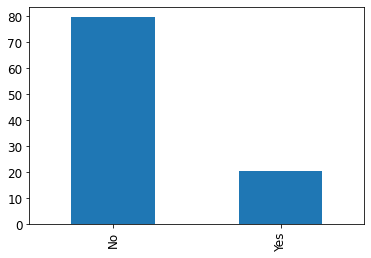

In [22]:
#Visualising Target Variable

#Distribution of customer churn

percent_dist = round(data["Exited"].value_counts()/len(data["Exited"])*100,2)
print(percent_dist)
percent_dist.plot(kind="bar")

**It can be clearly observed from the data that it is highly imbalanced where 80% of the customers still exists with the bank where only 20% of the customers have churned over the period of time. This was balanced later in the analysis using imblearn library in order to have accurate predictions.**

# Exploratory Analysis

**I have first looked into the current data trend and patterns in order to get customer insights from the current dataset and the position of the company.**

In [23]:
# creating bins for age groups and tenure to understand the churn trend based on the different customer demographics

bins_age = [18, 35, 55, 72, 92]
labels_age = ['Young_Adults',"Mid-Age",'Senior1','Senior2']
data['Age_Type'] = pd.cut(data.Age, bins_age, labels = labels_age,include_lowest = True)

bins_tenure = [0, 3, 6, 9,10]
labels_tenure = ['0-2','3-5','6-8','9-10']
data['Tenure_Group'] = pd.cut(data.Tenure, bins_tenure, labels = labels_tenure,include_lowest = True)

<AxesSubplot:xlabel='Tenure_Group'>

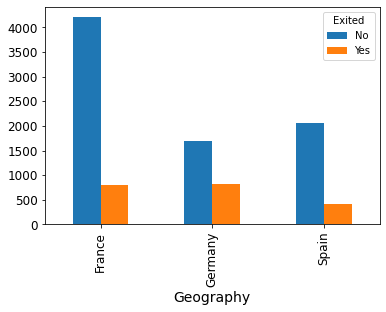

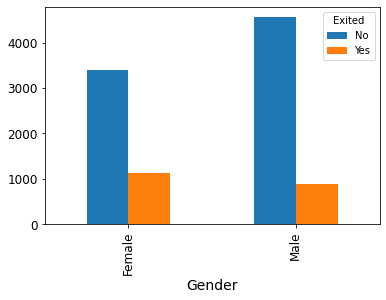

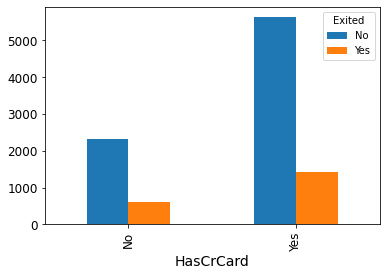

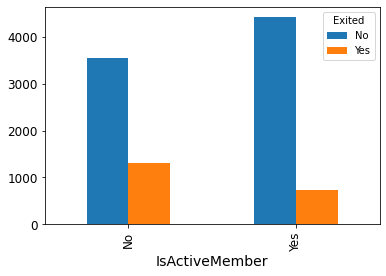

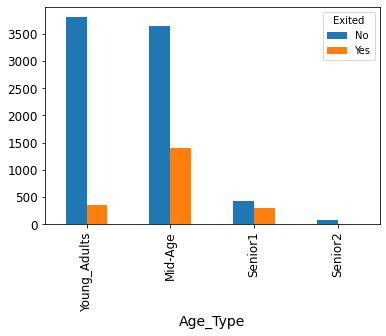

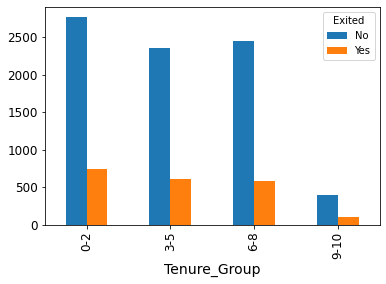

In [24]:
#relationship of churn with categorical features

data.groupby(['Exited','Geography']).size().unstack(0).plot.bar()
data.groupby(['Exited','Gender']).size().unstack(0).plot.bar()
data.groupby(['Exited','HasCrCard']).size().unstack(0).plot.bar()
data.groupby(['Exited','IsActiveMember']).size().unstack(0).plot.bar()
data.groupby(['Exited','Age_Type']).size().unstack(0).plot.bar()
data.groupby(['Exited','Tenure_Group']).size().unstack(0).plot.bar()

**From the bar graphs the following was observed:**

*-The large number of customers churn from Germany and France as compared to Spain. Since the data is imbalanced it can also be noticed that although most of the customers are churning from France but there is also a good portion of customers who still continue their business with the bank in France. The higher churn rate may be due to inefficient bank services in those locations or not many products to offer.*

*-Female customers are more likely to churn than male customers*

*-The customers having credit cards are two times more likely to leave the bank than the customers who don't have creadit cards*

*-The inactive members are two times more likely to churn than active customers. One major concern is that the the overall proportion of the inactive members is high suggesting that the bank may need to implement a program to turn this group to active members as it will dfinitely have a positive impact on the customer churn rate.*

*-In terms of the age groups it seems that mid-age people are more than three times likely to leave the bank as compared to Young Adults and Senior Citizen 1. It may be because this age group people have a well settled lifestyle with proper income and have high appetite for risk, so intead of investing in banking services they prefer to invest in stock markets or other investment plans.*

*-In terms of Tenure Group, the customers who were with the bank for two two years or less are more likely to churn than other customers and this may be because they were higher interest on their savings or better investment opportunities and services elsewhere.*

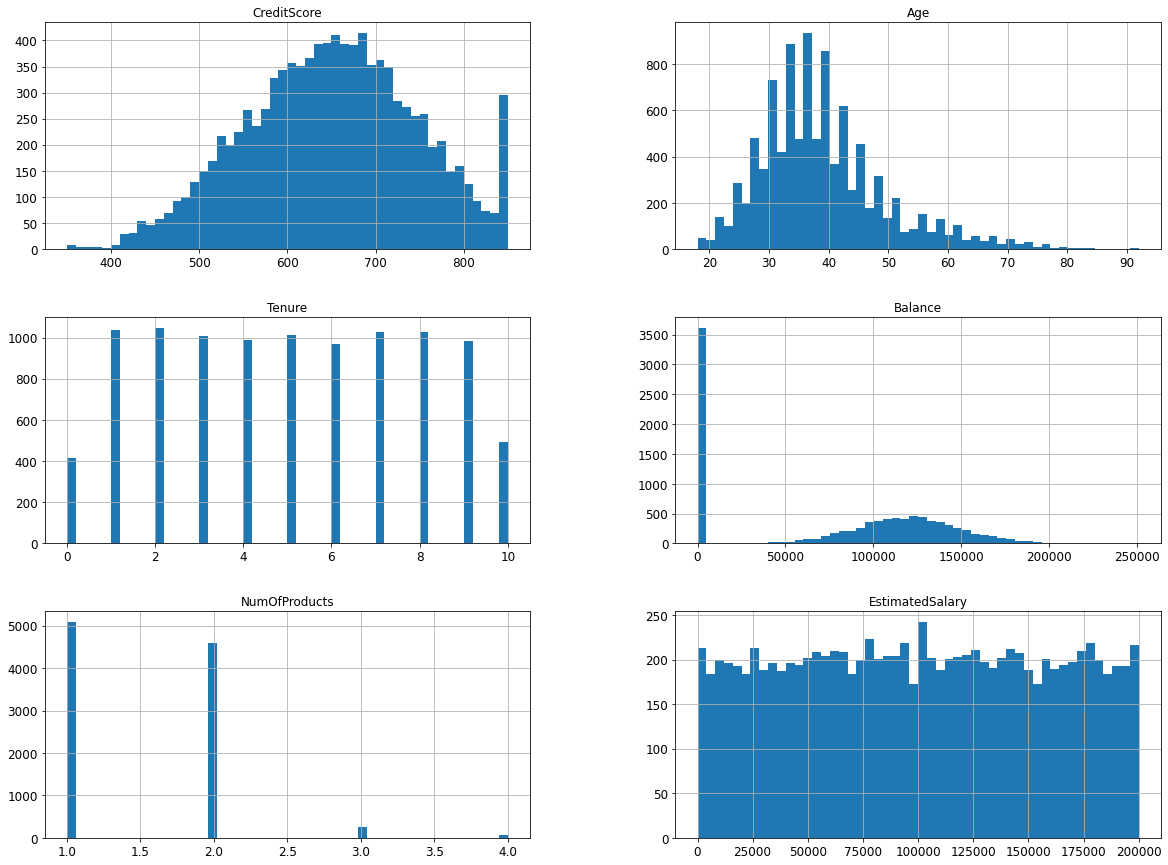

In [25]:
#histograms of continuous variables
attributes = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
%matplotlib inline
import matplotlib.pyplot as plt
data[attributes].hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

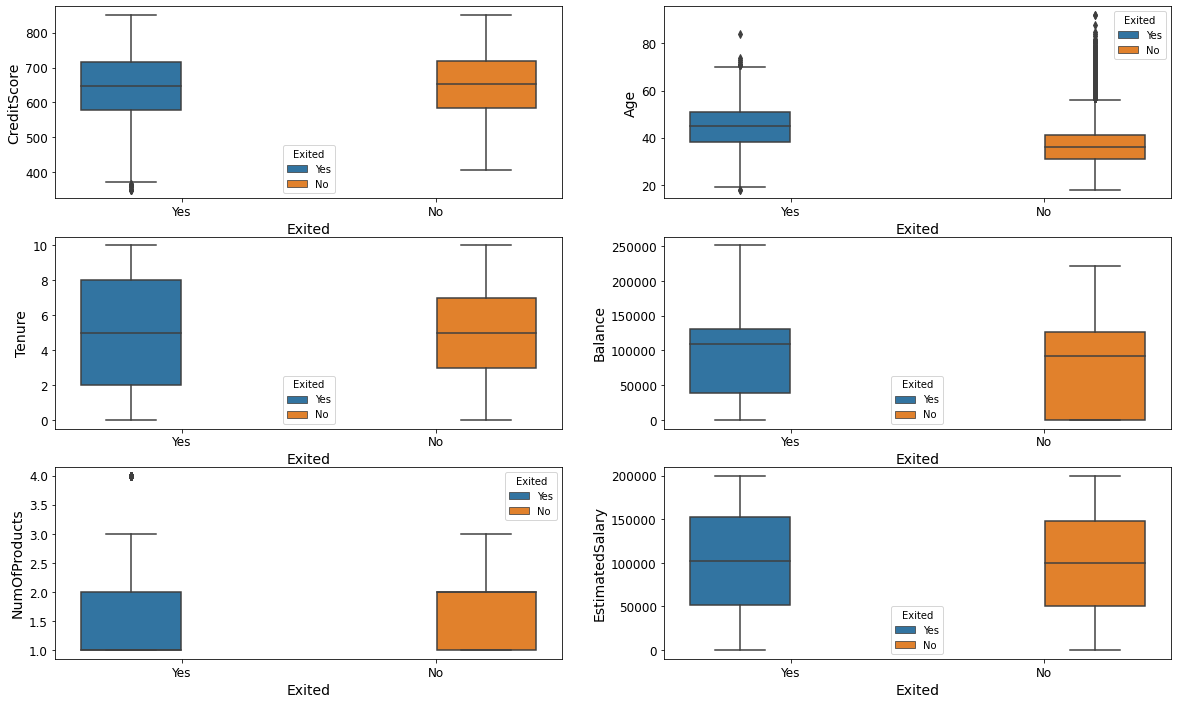

In [26]:
# Boxplots of continuous variables
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

**Below points were observed from histograms and boxplots:**

*-There is no significant difference in the credit score distribution between retained and churned customers. The histogram exhibits a left skew with a mean of ~650 dollars and standard deviation of ~96.5 dollars, having credit score between 550 to 800 dollars for most of the customers. This depicts that on an average the customers have a credit score of ~650 dollar and 50% of the customers have credit score below ~652 dollar. The skewness was majorly contributed by the customers who are leaving the bank since it has large number of outliers below the mean as can be observed from the boxplot.*

*-The Age variable is highly positively skewed, which illustrates that a large number of customers have age between 20 to 55 years. This depicts that on an average customers have age of ~40 years and 75% of the customers have age below ~44 years. The high positive skewness was majorly contributed by the existing customers and less by the customers who left the bank as can be seen from the boxplot showing outliers above the mean. It also depicts that the middle age customers between 35 to 55 are churning at a higher rate that the young adult customers which may be due to the service preferences in different age categories. The bank may need to review their target market or the startegy for retaining customers between different age groups.*

*-With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure. On an average the customers have stayed with the bank for ~5 years and 75% of the customers have tenure below ~7 years.*

*-The bank is losing customers with significant bank balances which is likely to hit their available capital for lending. On an average the balance maintained by customers is ~76000 dollar and 50% of the customers have balance below ~97000 dollar.*

*-Neither the product nor the salary has a significant effect on the likelihood to churn. The average salary of the customers in the bank is ~100000 dollars where 75% of the customers have salary below ~150000 dollars. The average number of products customers purchased were ~1.5 where 50% of the customers have products below ~1.*

Text(19.532065972222227, 0.5, 'Estimated Salary')

<Figure size 1440x1440 with 0 Axes>

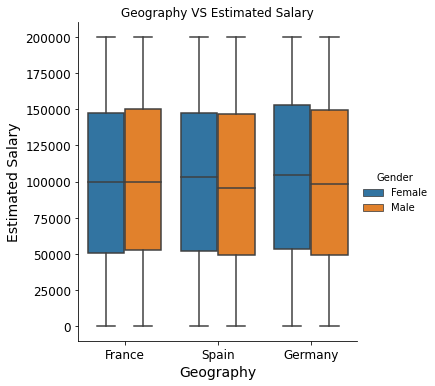

In [27]:
# Looking at Geography and Gender Distribution against Estimated Salary
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Gender", kind="box", data=data)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")

*Looking at the gender and geographic distribution of estimated salary, we see that male customer estimated average salary is higher than females in France, however in Germany female customers’ estimated average salary is higher. This reveals that why females are more likely to churn and in Germany, which may be due to better income and lifestyle they have better options to invest elsewhere and may be offered premium services or better rate of return on their savings from competitors of the bank.*

Saving figure scatter_matrix_plot


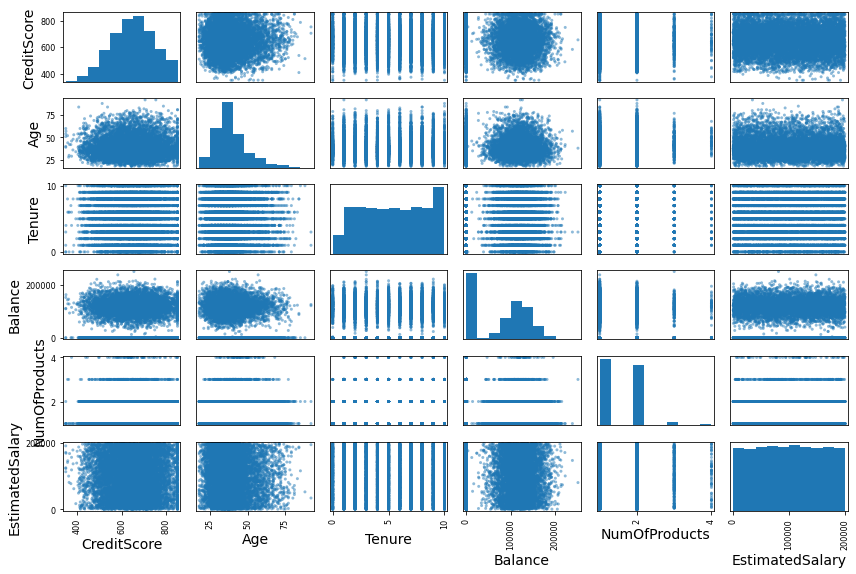

In [28]:
# Checking for variable relationships
#No linear relationship between the variables were observed

from pandas.plotting import scatter_matrix

attributes = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

# Data Preprocessing and Preparation

*The Customer ID, RowNumber, Surname are unique to each customers and therefore do not have nay predictive power therefore removed from the analysis. Similarly Age_Type and Tenure group was created to get insights about churn from the existing data of the company and these don't add value to the predictions since we already have these available as continuous variables in the dataset*

In [29]:
# Removing variables from the data which don't have any predictive power

data2 = data.drop(columns=["RowNumber","CustomerId","Surname","Age_Type","Tenure_Group"])

In [30]:
#Splitting Features into binary, numeric and categorical

binary_feature = data2.nunique()[data2.nunique() == 2].keys().tolist()
numeric_feature = [col for col in data2.select_dtypes(['float','int']).columns.tolist() if col not in binary_feature]
categorical_feature = [ col for col in data2.select_dtypes('object').columns.to_list() if col not in binary_feature + numeric_feature ]

In [31]:
# Feature Engineering by dummyfying the binary and categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in binary_feature:
    data2[i] = le.fit_transform(data2[i])

In [32]:
data2

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0           619.0    France       0   42       2       0.00              1   
1           608.0     Spain       0   41       1   83807.86              1   
2           502.0    France       0   42       8  159660.80              3   
3           699.0    France       0   39       1       0.00              2   
4           850.0     Spain       0   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995        771.0    France       1   39       5       0.00              2   
9996        516.0    France       1   35      10   57369.61              1   
9997        709.0    France       0   36       7       0.00              1   
9998        772.0   Germany       1   42       3   75075.31              2   
9999        792.0    France       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [33]:
data2 = pd.get_dummies(data2, columns = ["Geography"])

In [34]:
data2

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0           619.0       0   42       2       0.00              1          1   
1           608.0       0   41       1   83807.86              1          0   
2           502.0       0   42       8  159660.80              3          1   
3           699.0       0   39       1       0.00              2          0   
4           850.0       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995        771.0       1   39       5       0.00              2          1   
9996        516.0       1   35      10   57369.61              1          1   
9997        709.0       0   36       7       0.00              1          0   
9998        772.0       1   42       3   75075.31              2          1   
9999        792.0       0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0                  1        101348.88       1                 1   
1                  1        112542.58       0                 0   
2                  0        113931.57       1                 1   
3                  0         93826.63       0                 1   
4                  1         79084.10       0                 0   
...              ...              ...     ...               ...   
9995               0         96270.64       0                 1   
9996               1        101699.77       0                 1   
9997               1         42085.58       1                 1   
9998               0         92888.52       1                 0   
9999               0         38190.78       0                 1   

      Geography_Germany  Geography_Spain  
0                     0                0  
1                     0                1  
2                     0                0  
3                     0                0  
4                     0                1  
...                 ...              ...  
9995                  0                0  
9996                  0                0  
9997                  0                0  
9998                  1                0  
9999                  0                0  

[10000 rows x 13 columns]

CreditScore    Gender       Age    Tenure   Balance  \
CreditScore           1.000000 -0.003093 -0.004217  0.000772  0.006165   
Gender               -0.003093  1.000000 -0.027544  0.014733  0.011971   
Age                  -0.004217 -0.027544  1.000000 -0.009997  0.028236   
Tenure                0.000772  0.014733 -0.009997  1.000000 -0.012194   
Balance               0.006165  0.011971  0.028236 -0.012194  1.000000   
NumOfProducts         0.012395 -0.021859 -0.030680  0.013444 -0.304175   
HasCrCard            -0.005262  0.005766 -0.011721  0.022583 -0.014629   
IsActiveMember        0.024905  0.022544  0.085472 -0.028362 -0.010204   
EstimatedSalary      -0.001358 -0.007668 -0.007041  0.007580  0.012563   
Exited               -0.027157 -0.106512  0.285323 -0.014001  0.118145   
Geography_France     -0.008701  0.006772 -0.039208 -0.002848 -0.231142   
Geography_Germany     0.005739 -0.024628  0.046897 -0.000567  0.400802   
Geography_Spain       0.004315  0.016889 -0.001685  0.003868 -0.134799   

                   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
CreditScore             0.012395  -0.005262        0.024905        -0.001358   
Gender                 -0.021859   0.005766        0.022544        -0.007668   
Age                    -0.030680  -0.011721        0.085472        -0.007041   
Tenure                  0.013444   0.022583       -0.028362         0.007580   
Balance                -0.304175  -0.014629       -0.010204         0.012563   
NumOfProducts           1.000000   0.003183        0.009612         0.014443   
HasCrCard               0.003183   1.000000       -0.011866        -0.009769   
IsActiveMember          0.009612  -0.011866        1.000000        -0.011343   
EstimatedSalary         0.014443  -0.009769       -0.011343         1.000000   
Exited                 -0.047820  -0.007138       -0.156128         0.012447   
Geography_France        0.001230   0.002467        0.003317        -0.003268   
Geography_Germany      -0.010419   0.010577       -0.020486         0.010280   
Geography_Spain         0.009039  -0.013480        0.016732        -0.006539   

                     Exited  Geography_France  Geography_Germany  \
CreditScore       -0.027157         -0.008701           0.005739   
Gender            -0.106512          0.006772          -0.024628   
Age                0.285323         -0.039208           0.046897   
Tenure            -0.014001         -0.002848          -0.000567   
Balance            0.118145         -0.231142           0.400802   
NumOfProducts     -0.047820          0.001230          -0.010419   
HasCrCard         -0.007138          0.002467           0.010577   
IsActiveMember    -0.156128          0.003317          -0.020486   
EstimatedSalary    0.012447         -0.003268           0.010280   
Exited             1.000000         -0.104955           0.173488   
Geography_France  -0.104955          1.000000          -0.580359   
Geography_Germany  0.173488         -0.580359           1.000000   
Geography_Spain   -0.052667         -0.575418          -0.332084   

                   Geography_Spain  
CreditScore               0.004315  
Gender                    0.016889  
Age                      -0.001685  
Tenure                    0.003868  
Balance                  -0.134799  
NumOfProducts             0.009039  
HasCrCard                -0.013480  
IsActiveMember            0.016732  
EstimatedSalary          -0.006539  
Exited                   -0.052667  
Geography_France         -0.575418  
Geography_Germany        -0.332084  
Geography_Spain           1.000000

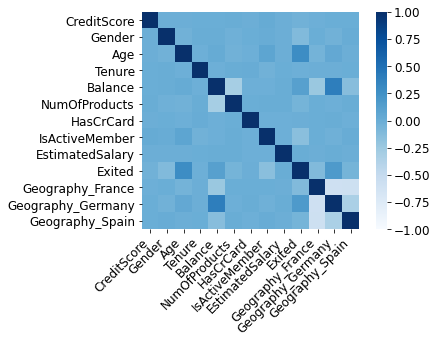

In [35]:
# detecting correlations between variables
# There was no correlation between variables as the correlation coefficients were less than 0.85, hence there is no collinearity issues in the data
data_corr = data2.corr()

ax = sns.heatmap(
   data_corr, 
    vmin=-1, vmax=1, center=0,
    cmap = "Blues",square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

data_corr

In [36]:
data_corr["Exited"].sort_values(ascending=False)

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118145
EstimatedSalary      0.012447
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027157
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender              -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

In [37]:
# Creating X and Y variables
X = data2.drop(columns=["Exited"])
y = data2["Exited"]

In [38]:
# balancing Imbalanced data
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_resampled, y_resampled = ros.fit_resample(X, y)

In [39]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [40]:
y_resampled.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# Training,Tuning and Building Model

In [41]:
#Splitting dataset into training and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.30,random_state=0)

**Detecting and removing outliers from the testing dataset**

<AxesSubplot:xlabel='Age'>

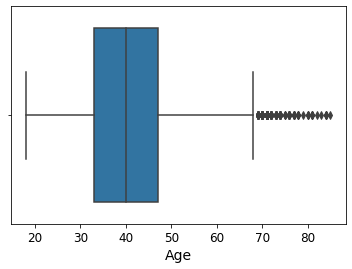

In [42]:
sns.boxplot(x="Age",data=X_train)

<AxesSubplot:xlabel='CreditScore'>

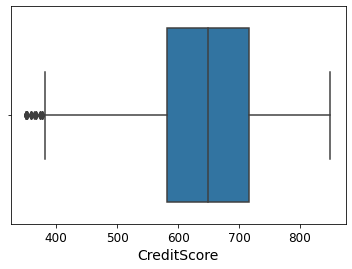

In [43]:
sns.boxplot(x="CreditScore",data=X_train)

In [44]:
# As observed from the boxplots, the CreditScore have outliers below the score of 380, hence removed these outliers from the data

X_train[X_train["CreditScore"]<380].count()


CreditScore          32
Gender               32
Age                  32
Tenure               32
Balance              32
NumOfProducts        32
HasCrCard            32
IsActiveMember       32
EstimatedSalary      32
Geography_France     32
Geography_Germany    32
Geography_Spain      32
dtype: int64

In [45]:
X_train[X_train["CreditScore"]<380].index

Int64Index([12568, 13710, 10542, 13182, 14950, 13362, 11857, 15011, 10369,
            11718,   942,  8154, 11208,  9624,  1405, 12760, 12092, 14140,
            13010, 14960, 12737, 15706, 11365,  9356,  1962, 15871, 14519,
             1193,  1631,  1838, 14299, 10215],
           dtype='int64')

In [46]:
# As observed from the boxplots, the Age has outlier above the age of 57, hence removed these outliers from the data

X_train[X_train["Age"]>68].count()


CreditScore          167
Gender               167
Age                  167
Tenure               167
Balance              167
NumOfProducts        167
HasCrCard            167
IsActiveMember       167
EstimatedSalary      167
Geography_France     167
Geography_Germany    167
Geography_Spain      167
dtype: int64

In [47]:
X_train[X_train["Age"]>68].index.tolist()

[6046,
 1055,
 9333,
 7057,
 2433,
 7272,
 7302,
 3499,
 8469,
 4256,
 9894,
 8304,
 6278,
 4170,
 85,
 13425,
 3910,
 14732,
 12305,
 5148,
 3646,
 10757,
 6230,
 12136,
 6581,
 4162,
 8865,
 9380,
 1866,
 5377,
 7552,
 9309,
 13167,
 15634,
 158,
 11158,
 3691,
 3994,
 766,
 7058,
 12946,
 5159,
 4463,
 14864,
 3888,
 3826,
 1342,
 14319,
 559,
 9646,
 1904,
 13822,
 9555,
 4644,
 2012,
 13476,
 1039,
 10489,
 13134,
 2159,
 1790,
 8488,
 4849,
 7956,
 5313,
 14147,
 9736,
 10138,
 3602,
 12673,
 4318,
 9080,
 3651,
 5783,
 9506,
 10899,
 8458,
 8444,
 3142,
 9936,
 2925,
 1407,
 12088,
 9589,
 15604,
 13039,
 14653,
 9587,
 3110,
 5299,
 9428,
 4931,
 9734,
 2772,
 9490,
 5817,
 1410,
 15917,
 15512,
 3702,
 2094,
 7202,
 11572,
 5223,
 1009,
 12158,
 5671,
 12976,
 3033,
 12510,
 4590,
 7499,
 2901,
 4801,
 4815,
 3317,
 5197,
 7194,
 9318,
 12588,
 9292,
 3531,
 15385,
 14582,
 7692,
 969,
 602,
 2855,
 7063,
 9402,
 15873,
 15359,
 14659,
 7526,
 4366,
 10595,
 1981,
 310,
 1205,

In [48]:
X_train = X_train.drop([12568, 13710, 10542, 13182, 14950, 13362, 11857, 15011, 10369,11718, 942, 8154, 11208, 9624, 1405, 12760, 12092, 14140,13010, 14960, 12737, 15706, 11365, 9356, 1962, 15871, 14519,1193, 1631, 1838, 14299, 10215,6046,1055,9333,7057,2433,7272,7302,3499,8469,4256,9894,8304,6278,4170,85,13425,3910,14732,12305,5148,3646,10757,6230,12136,6581,4162,8865,9380,1866,5377,7552,9309,13167,15634,158,11158,3691,3994,766,7058,12946,5159,4463,14864,3888,3826,1342,14319,559,9646,1904,13822,9555,4644,2012,13476,1039,10489,13134,2159,1790,8488,4849,7956,5313,14147,9736,10138,3602,12673,4318,9080,3651,5783,9506,10899,8458,8444,3142,9936,2925,1407,12088,9589,15604,13039,14653,9587,3110,5299,9428,4931,9734,2772,9490,5817,1410,15917,15512,3702,2094,7202,11572,5223,1009,12158,5671,12976,3033,12510,4590,7499,2901,4801,4815,3317,5197,7194,9318,12588,9292,3531,15385,14582,7692,969,602,2855,7063,9402,15873,15359,14659,7526,4366,10595,1981,310,1205,3387,3527,13694,6173,8686,14357,1614,8019,3366,4378,14552,9425,14591,13509,7719,9112,13657,8156,15055,8930,8787,7788,9671,13948,3396,807,6167,10200])

In [49]:
y_train = y_train.drop([12568, 13710, 10542, 13182, 14950, 13362, 11857, 15011, 10369,11718, 942, 8154, 11208, 9624, 1405, 12760, 12092, 14140,13010, 14960, 12737, 15706, 11365, 9356, 1962, 15871, 14519,1193, 1631, 1838, 14299, 10215,6046,1055,9333,7057,2433,7272,7302,3499,8469,4256,9894,8304,6278,4170,85,13425,3910,14732,12305,5148,3646,10757,6230,12136,6581,4162,8865,9380,1866,5377,7552,9309,13167,15634,158,11158,3691,3994,766,7058,12946,5159,4463,14864,3888,3826,1342,14319,559,9646,1904,13822,9555,4644,2012,13476,1039,10489,13134,2159,1790,8488,4849,7956,5313,14147,9736,10138,3602,12673,4318,9080,3651,5783,9506,10899,8458,8444,3142,9936,2925,1407,12088,9589,15604,13039,14653,9587,3110,5299,9428,4931,9734,2772,9490,5817,1410,15917,15512,3702,2094,7202,11572,5223,1009,12158,5671,12976,3033,12510,4590,7499,2901,4801,4815,3317,5197,7194,9318,12588,9292,3531,15385,14582,7692,969,602,2855,7063,9402,15873,15359,14659,7526,4366,10595,1981,310,1205,3387,3527,13694,6173,8686,14357,1614,8019,3366,4378,14552,9425,14591,13509,7719,9112,13657,8156,15055,8930,8787,7788,9671,13948,3396,807,6167,10200])

In [50]:
# Standardising training and testing dataset
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns = X.columns)
X_test = standardizer.transform(X_test)
X_test = pd.DataFrame(X_test,columns = X.columns)

# Feature Selection

In [51]:
# Lasso Feature Selection Method

from sklearn.linear_model import Lasso 
model = Lasso(alpha=0.01, random_state=0)
model.fit(X_train,y_train)
model_ldf= pd.DataFrame(list(zip(X_train.columns,model.coef_)),columns=['predictor','coefficient'])

In [52]:
model_ldf

predictor  coefficient
0         CreditScore    -0.000000
1              Gender    -0.040229
2                 Age     0.181145
3              Tenure    -0.000000
4             Balance     0.027665
5       NumOfProducts    -0.001128
6           HasCrCard    -0.000000
7      IsActiveMember    -0.075271
8     EstimatedSalary     0.000000
9    Geography_France    -0.000000
10  Geography_Germany     0.064890
11    Geography_Spain     0.000000

In [53]:
#Recursive Feature Elimination Method
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
rfe = RFE(lr, n_features_to_select=5)
model_l = rfe.fit(X_train, y_train)
pd.DataFrame(list(zip(X_train.columns,model_l.ranking_)), columns = ['predictor','ranking'])

predictor  ranking
0         CreditScore        6
1              Gender        1
2                 Age        1
3              Tenure        8
4             Balance        1
5       NumOfProducts        4
6           HasCrCard        7
7      IsActiveMember        1
8     EstimatedSalary        5
9    Geography_France        2
10  Geography_Germany        1
11    Geography_Spain        3

In [54]:
#Removing useless predictors from training & testing dataset which were depicted from lasso and RFE feature selection methods

X_train = X_train.drop(columns = ["CreditScore","Tenure","HasCrCard","EstimatedSalary","Geography_Spain","Geography_France"])
X_test = X_test.drop(columns = ["CreditScore","Tenure","HasCrCard","EstimatedSalary","Geography_Spain","Geography_France"])

# Building Models with fine tunings

**Logistic Regression Model**

In [55]:
#logistic Regression Model

#importing libraries

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=0)

In [56]:
#Fine tuning the model using Grid Search

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [100], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001], 'solver':['liblinear']}
model = GridSearchCV(logit,param_grid,scoring = "accuracy",cv=5,verbose = 0)
result = model.fit(X_train,y_train)
model.cv_results_
df_logit = pd.DataFrame(model.cv_results_)
df_logit

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.015757      0.002706         0.002594        0.000798     0.1   
1        0.014601      0.002304         0.000000        0.000000     0.1   
2        0.010687      0.006401         0.003124        0.006248     0.1   
3        0.009745      0.008530         0.003531        0.006113     0.5   
4        0.010713      0.006326         0.001219        0.001621     0.5   
5        0.011455      0.001455         0.002388        0.000483     0.5   
6        0.011783      0.000759         0.002381        0.000490       1   
7        0.010571      0.000491         0.002396        0.000493       1   
8        0.010970      0.001092         0.002201        0.000411       1   
9        0.009476      0.000844         0.001609        0.003218      10   
10       0.008251      0.000396         0.001628        0.000814      10   
11       0.010366      0.001021         0.002194        0.000397      10   
12       0.011571      0.000491         0.002192        0.000395      50   
13       0.009779      0.000728         0.002387        0.000495      50   
14       0.011374      0.000487         0.002002        0.000010      50   
15       0.008378      0.001034         0.002622        0.002845     100   
16       0.008195      0.000390         0.000598        0.000797     100   
17       0.009687      0.000820         0.000409        0.000817     100   

   param_fit_intercept param_intercept_scaling param_max_iter param_penalty  \
0                 True                       1            100            l2   
1                 True                       1            100            l2   
2                 True                       1            100            l2   
3                 True                       1            100            l2   
4                 True                       1            100            l2   
5                 True                       1            100            l2   
6                 True                       1            100            l2   
7                 True                       1            100            l2   
8                 True                       1            100            l2   
9                 True                       1            100            l2   
10                True                       1            100            l2   
11                True                       1            100            l2   
12                True                       1            100            l2   
13                True                       1            100            l2   
14                True                       1            100            l2   
15                True                       1            100            l2   
16                True                       1            100            l2   
17                True                       1            100            l2   

   param_solver param_tol                                             params  \
0     liblinear     1e-05  {'C': 0.1, 'fit_intercept': True, 'intercept_s...   
1     liblinear    0.0001  {'C': 0.1, 'fit_intercept': True, 'intercept_s...   
2     liblinear     1e-06  {'C': 0.1, 'fit_intercept': True, 'intercept_s...   
3     liblinear     1e-05  {'C': 0.5, 'fit_intercept': True, 'intercept_s...   
4     liblinear    0.0001  {'C': 0.5, 'fit_intercept': True, 'intercept_s...   
5     liblinear     1e-06  {'C': 0.5, 'fit_intercept': True, 'intercept_s...   
6     liblinear     1e-05  {'C': 1, 'fit_intercept': True, 'intercept_sca...   
7     liblinear    0.0001  {'C': 1, 'fit_intercept': True, 'intercept_sca...   
8     liblinear     1e-06  {'C': 1, 'fit_intercept': True, 'intercept_sca...   
9     liblinear     1e-05  {'C': 10, 'fit_intercept': True, 'intercept_sc...   
10    liblinear    0.0001  {'C': 10, 'fit_intercept': True, 'intercept_sc...   
11    liblinear     1e-06  {'C': 10, 'fit_intercept': True, 'intercept_sc...   
12    liblinear  

In [57]:
print(f'Best Accuracy: {result.best_score_} for {result.best_params_}')

Best Accuracy: 0.7188786606340127 for {'C': 10, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}


In [58]:
#Fitting the Model and getting accuracy, precision and recall scores

model_lr = LogisticRegression(C=0.1, max_iter = 100,tol = 0.00001)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
lr_corr = metrics.confusion_matrix(y_test, y_pred_lr)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_lr)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_lr)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_lr)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_lr)))

Accuracy_Score: 0.712222687316869
Precision_Score: 0.7134478424801005
Recall_Score: 0.7113617376775272
F1_Score: 0.712403262915708


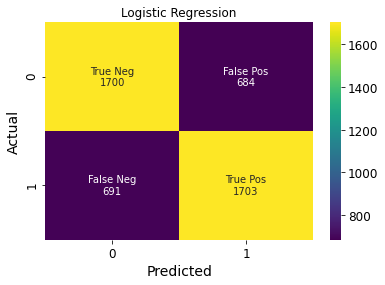

In [59]:
# Confusion Matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                lr_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(lr_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "Logistic Regression"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

**Random Forest Classifier Model**

In [60]:
#Random Forest Classifier

#Model Built

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10,12],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc_result = CV_rfc.fit(X_train, y_train)
CV_rfc.cv_results_
df_rfc = pd.DataFrame(CV_rfc.cv_results_)
df_rfc

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.634000      0.011227         0.042368        0.002165   
1        1.528269      0.015828         0.106772        0.003637   
2        0.565494      0.025708         0.040656        0.005099   
3        1.395934      0.052217         0.100481        0.001402   
4        0.625073      0.084571         0.048544        0.007272   
5        1.606077      0.074768         0.113295        0.006834   
6        0.809059      0.032692         0.060577        0.003467   
7        1.883231      0.188683         0.139829        0.011792   
8        0.805966      0.091317         0.057689        0.007577   
9        1.729876      0.041044         0.131581        0.005952   
10       0.697583      0.008198         0.055581        0.004224   
11       1.990763      0.187816         0.149514        0.015626   
12       0.816703      0.034458         0.065182        0.004952   
13       2.066888      0.119688         0.159062        0.007694   
14       0.824797      0.024146         0.063943        0.003160   
15       1.978098      0.042609         0.155296        0.004070   
16       0.812145      0.032840         0.064362        0.008369   
17       1.988462      0.039662         0.151081        0.004580   
18       0.898471      0.023220         0.070837        0.000390   
19       2.457530      0.054370         0.183886        0.011771   
20       0.894589      0.022552         0.072077        0.002978   
21       2.491221      0.060851         0.186733        0.009836   
22       0.913170      0.055939         0.069190        0.006314   
23       2.223267      0.014948         0.174485        0.003398   
24       0.982746      0.010817         0.080164        0.004417   
25       2.476346      0.017370         0.194944        0.003603   
26       0.985901      0.011952         0.078657        0.003035   
27       2.473579      0.021885         0.196834        0.004802   
28       0.980569      0.008720         0.078618        0.003129   
29       2.531746      0.057248         0.200507        0.006722   
30       0.637737      0.004743         0.043536        0.003961   
31       1.572374      0.012310         0.100809        0.000042   
32       0.627503      0.007162         0.041937        0.003202   
33       1.578906      0.019842         0.106033        0.003509   
34       0.630889      0.008414         0.042722        0.003886   
35       1.570764      0.004381         0.101569        0.001028   
36       0.777628      0.005549         0.054126        0.004408   
37       1.972801      0.099096         0.133193        0.006523   
38       0.772521      0.007982         0.050727        0.000264   
39       1.920748      0.024511         0.127808        0.003980   
40       0.767871      0.011105         0.053287        0.003966   
41       1.906768      0.023982         0.129131        0.003115   
42       0.919840      0.018977         0.063118        0.003787   
43       2.235703      0.007037         0.147696        0.004898   
44       0.905038      0.014759         0.062569        0.003269   
45       2.272380      0.031135         0.151470        0.000690   
46       0.896377      0.007660         0.060507        0.000087   
47       2.264142      0.022613         0.150129        0.003548   
48       1.032466      0.010230         0.069232        0.003103   
49       2.851398      0.322164         0.186123        0.017206   
50       1.031828      0.013278         0.067507        0.004097   
51       2.726102      0.136662         0.181178        0.011856   
52       1.096423      0.059408         0.072671        0.003258   
53       2.610893      0.031759         0.170163        0.003389   
54       1.162832      0.012014         0.079284        0.004039   
55       2.912518      0.003832         0.195086        0.004420   
56       1.171971      0.007789         0.077203        0.004867   
57       2.935950      0.013657         0.196785        0.00

In [61]:
print(f'Best Accuracy: {rfc_result.best_score_} for {rfc_result.best_params_}')

Best Accuracy: 0.8554213992336109 for {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 200}


In [62]:
# Fitting the Model and getting accuracy, precision and recall scores

model_rfc = RandomForestClassifier(criterion='gini',max_depth=12,max_features='log2',n_estimators=200)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)
rfc_corr = metrics.confusion_matrix(y_test, y_pred_rfc)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_rfc)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_rfc)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_rfc)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_rfc)))

Accuracy_Score: 0.8551695269987443
Precision_Score: 0.8376984126984127
Recall_Score: 0.8817878028404345
F1_Score: 0.8591778591778593


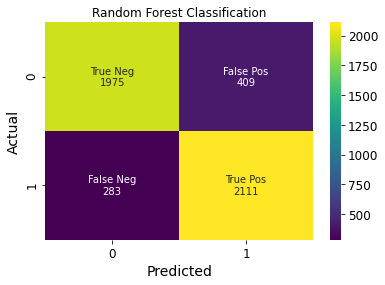

In [63]:
# Confusion Matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rfc_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(rfc_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "Random Forest Classification"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

In [64]:
# Feature Importance

feature_importances_rfc = rfc_result.best_estimator_.feature_importances_
feature_importances_rfc

array([0.02589426, 0.38647798, 0.28748367, 0.20448017, 0.04816165,
       0.04750227])

In [65]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

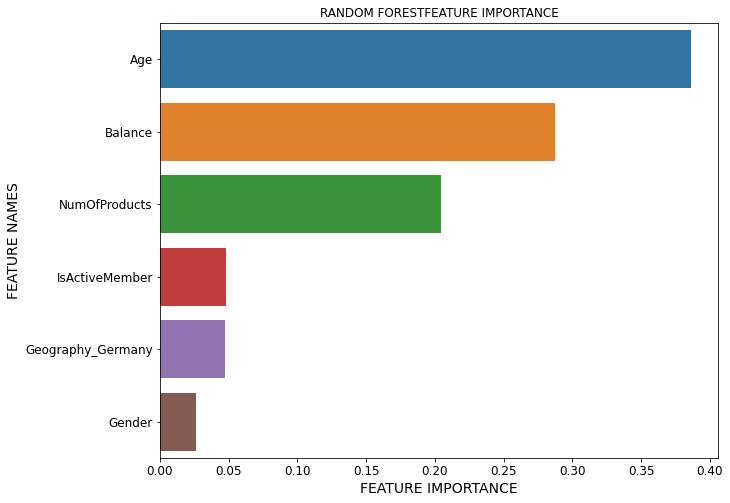

In [66]:
plot_feature_importance(rfc_result.best_estimator_.feature_importances_,X_train.columns,'RANDOM FOREST')

**Gradient Boosting Classifier Model**

In [67]:
# Gradient Boosting Classifier

# Model Built

from sklearn.ensemble import GradientBoostingClassifier
gbt = GradientBoostingClassifier(random_state=0)
parameters = {
    "learning_rate": [0.01, 0.025, 0.05,],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[200,500]
    }

clf = GridSearchCV(estimator=gbt, param_grid=parameters, cv=5,verbose = 0)
gbt_result = clf.fit(X_train, y_train)
clf.cv_results_
df_gbt = pd.DataFrame(clf.cv_results_)
df_gbt

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.593617      0.033160         0.010152        0.000092   
1        1.426063      0.036632         0.021602        0.001190   
2        0.618771      0.067528         0.012140        0.003994   
3        1.444787      0.032890         0.022791        0.003002   
4        0.910678      0.007970         0.016951        0.003924   
5        2.329781      0.127282         0.042481        0.003066   
6        0.938282      0.045105         0.018646        0.003248   
7        2.275319      0.035514         0.040193        0.000849   
8        2.323234      0.013803         0.033723        0.003873   
9        5.695451      0.194052         0.074048        0.002808   
10       2.310642      0.027854         0.030474        0.000177   
11       5.519428      0.022121         0.071989        0.003380   
12       0.562184      0.005043         0.010140        0.000050   
13       1.400405      0.010055         0.020643        0.000802   
14       0.566512      0.007622         0.010092        0.000013   
15       1.405866      0.020647         0.019838        0.000786   
16       0.897046      0.007405         0.018299        0.003166   
17       2.234012      0.004897         0.038474        0.002947   
18       0.898752      0.002772         0.015739        0.003867   
19       2.229005      0.013777         0.036881        0.004420   
20       2.463363      0.239422         0.032686        0.003900   
21       5.554664      0.244822         0.070514        0.010961   
22       2.186541      0.025706         0.029860        0.000825   
23       5.420024      0.016967         0.066738        0.004013   
24       0.573183      0.009242         0.010120        0.000045   
25       1.415073      0.020777         0.019813        0.000845   
26       0.571783      0.008558         0.009749        0.000826   
27       1.415426      0.019404         0.018699        0.003214   
28       0.901028      0.011929         0.016055        0.004078   
29       2.245925      0.008811         0.034522        0.005033   
30       0.897094      0.012674         0.013360        0.003509   
31       2.246632      0.015877         0.037021        0.003614   
32       2.240329      0.119475         0.030404        0.000122   
33       5.559136      0.241579         0.069799        0.012087   
34       2.228822      0.088191         0.029994        0.000861   
35       5.392444      0.083393         0.065028        0.005187   

   param_learning_rate param_max_depth param_max_features param_n_estimators  \
0                 0.01               3               log2                200   
1                 0.01               3               log2                500   
2                 0.01               3               sqrt                200   
3                 0.01               3               sqrt                500   
4                 0.01               5               log2                200   
5                 0.01               5               log2                500   
6                 0.01               5               sqrt                200   
7                 0.01               5               sqrt                500   
8                 0.01               8               log2                200   
9                 0.01               8               log2                500   
10                0.01               8               sqrt                200   
11                0.01               8               sqrt                500   
12               0.025               3               log2                200   
13               0.025               3               log2                500   
14               0.025               3               sqrt                200   
15               0.025               3               sqrt                500   
16               0.025               5               log2                200   
17               0.025               5         

In [68]:
print(f'Best Accuracy: {gbt_result.best_score_} for {gbt_result.best_params_}')

Best Accuracy: 0.8788938048482345 for {'learning_rate': 0.05, 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


In [69]:
#Fitting the Model and getting accuracy, precision and recall scores

model_gbt = GradientBoostingClassifier(learning_rate=0.05,max_depth=8,max_features='log2',n_estimators=500)
model_gbt.fit(X_train, y_train)
y_pred_gbt = model_gbt.predict(X_test)
gbt_corr = metrics.confusion_matrix(y_test, y_pred_gbt)
print("Accuracy_Score: {}".format(accuracy_score(y_test,y_pred_gbt)))
print("Precision_Score: {}".format(precision_score(y_test,y_pred_gbt)))
print("Recall_Score: {}".format(recall_score(y_test,y_pred_gbt)))
print("F1_Score: {}".format(metrics.f1_score(y_test,y_pred_gbt)))

Accuracy_Score: 0.8827961490163249
Precision_Score: 0.8537808641975309
Recall_Score: 0.9243943191311612
F1_Score: 0.8876855194544725


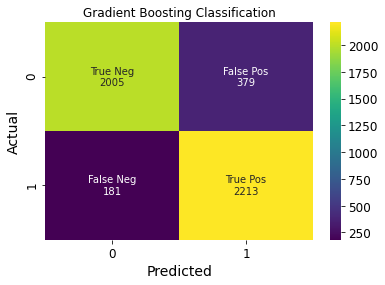

In [70]:
# Confusion Matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                gbt_corr.flatten()]

labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(gbt_corr, fmt = '',cmap = 'viridis', annot=labels);
title = "Gradient Boosting Classification"
ylabel = "Actual"
xlabel = "Predicted"
plt.title(title)
plt.ylabel(ylabel)
plt.xlabel(xlabel);

In [71]:
# Feature Importance
feature_importances_gbt = gbt_result.best_estimator_.feature_importances_
feature_importances_gbt

array([0.02514416, 0.33710627, 0.34849966, 0.19598894, 0.04611661,
       0.04714436])

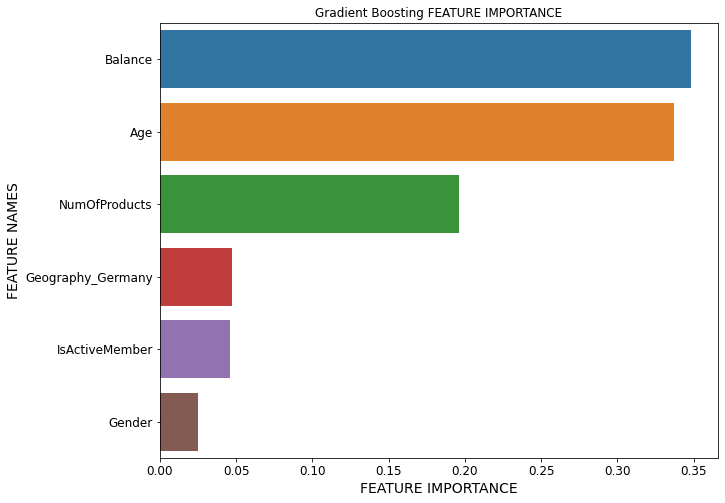

In [72]:
plot_feature_importance(gbt_result.best_estimator_.feature_importances_,X_train.columns,'Gradient Boosting ')

**Summary of Scores**

In [73]:
# Final Summary of Scores

df = {'Models': ["Logistic Regression","Random Forest Classifier","Gradient Boosting Classifier"],
     'Accuracy Scores': ['71.22%','85.04%','88.13%'],
     'Precision Score': ['71.34%','83.41%','85.23%'],
     'Recall Score': ['71.14%','87.55%','92.31%'],
     'F1 Score': ['71.24%','85.43%','88.63%'],
     'False Positives': ['28.69%','17.49%','16.07%'],
     'False Negatives': ['28.86%','12.45%','7.69%']}

summary = pd.DataFrame(df)

In [74]:
summary

Models Accuracy Scores Precision Score Recall Score  \
0           Logistic Regression          71.22%          71.34%       71.14%   
1      Random Forest Classifier          85.04%          83.41%       87.55%   
2  Gradient Boosting Classifier          88.13%          85.23%       92.31%   

  F1 Score False Positives False Negatives  
0   71.24%          28.69%          28.86%  
1   85.43%          17.49%          12.45%  
2   88.63%          16.07%           7.69%